In [ ]:
! pip install --upgrade arabic-reshaper


In [ ]:
! pip install python-bidi


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Imports

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import arabic_reshaper
from bidi.algorithm import get_display
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


## Data Loading

In [ ]:
datafilename = "Fake_ad_datasetـ (1).xlsx"
pdf_train = pd.read_excel(datafilename)
#pdf_train = pdf[pdf['split']=='train']
#pdf_test  = pdf[pdf['split']=='test']

## Exploratory Data Analysis


In [ ]:
pdf_train.head(100)


,Text,Personal Email,Name of company,Mobile Number,High_income,Class
0,#وظائف #الصيدلة \n\n3 شواغر بمسمى (فني صيدلي) ...,1.0,0.0,0.0,0.0,1.0
1,#وظائف #الصيدلة \n\nشركه طبيه متخصصه في الادوي...,1.0,0.0,0.0,0.0,1.0
2,#وظائف #الصيدلة \n\nالسلام عليكم ورحمة الله وب...,0.0,1.0,1.0,0.0,1.0
3,#وظائف #الصيدلة \n\nمجموعة صيدليات بحاجة الى :...,1.0,0.0,0.0,0.0,1.0
4,#وظائف #الصيدلة \n\nالسلام عليكم \nيارب تكونو ...,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...
95,شاغر وظيفي بصيدلية ليفا بالرياض. حي الصحافه\nا...,0.0,1.0,1.0,0.0,1.0
96,مطلوب صيدلاني/صيدلانيه للعمل في مستشفى خاص بمد...,1.0,0.0,0.0,1.0,1.0
97,شاغر بمجمع عزيز الطبي بالأحساء \nالشروط : \nصي...,0.0,1.0,1.0,0.0,1.0
98,السلام عليكم \nمجمع الصقر الطبي بمكة (الشرايع)...,0.0,1.0,1.0,1.0,1.0


In [ ]:
print("Length Train:",len(pdf_train))


Length Train: 1656


In [ ]:
pdf_train = pdf_train[pdf_train['Class'].notna()]

In [ ]:
pdf_train['Class'].unique()

array([1., 0.])

In [ ]:
results = Counter()
# spliting by space, use regExp or another tokenizer
pdf_train['Text'].str.split().apply(results.update)
CountData = pd.DataFrame([[k,results[k]] for k in results],)
CountData.columns = ['word','counts']

In [ ]:
CountData[:10]


,word,counts
0,#وظائف,213
1,#الصيدلة,25
2,3,26
3,شواغر,46
4,بمسمى,107
5,(فني,1
6,صيدلي),1
7,بمستشفى,9
8,رعاية,6
9,بالرياض,116


In [ ]:
CountDataSorted = CountData.sort_values(['counts'],ascending=False)
CountDataSorted = CountDataSorted.set_index('word')

In [ ]:
CountDataSorted[:10]


,counts
word,
في,1556
-,1049
:,691
على,624
عن,500
الرياض,469
▪️,460
وظائف,453
من,408


## Data Visualization

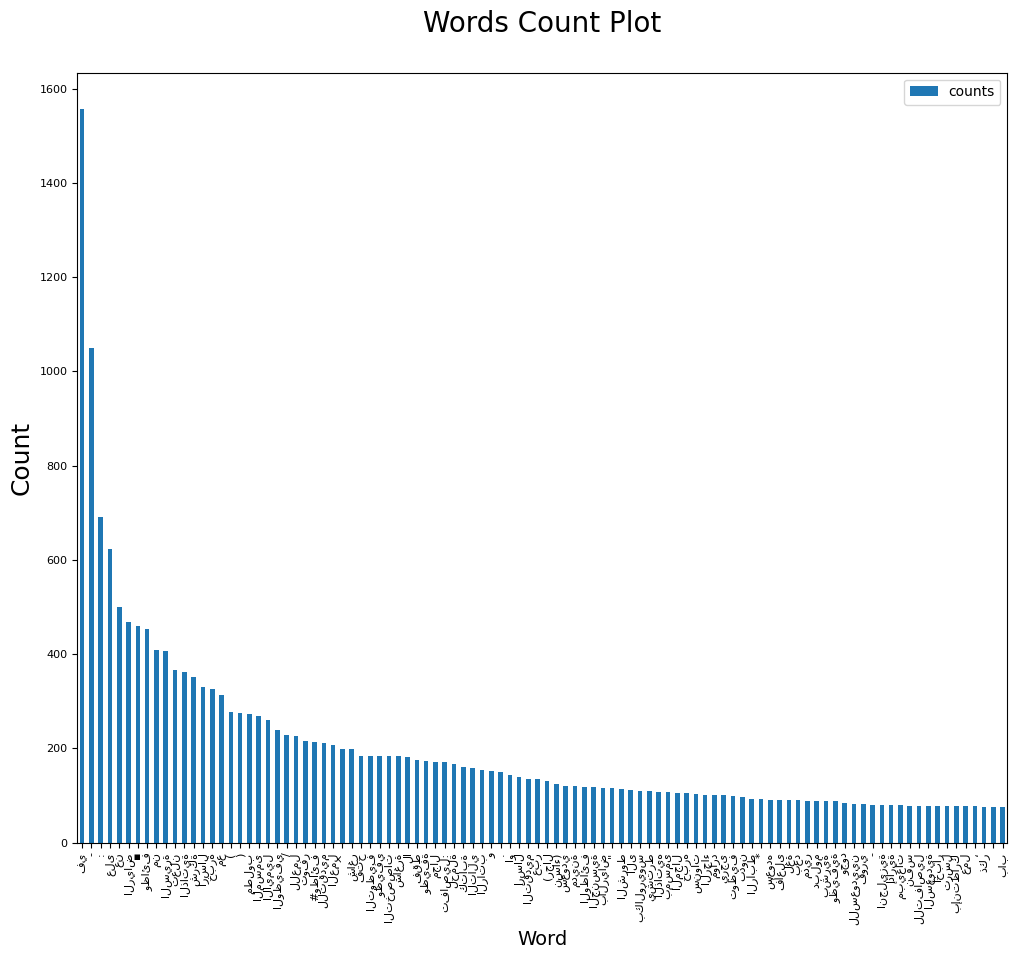

In [ ]:
#%matplotlib inline
ax = CountDataSorted[:100].plot(kind='bar', fontsize=8, figsize=(12,10))
ax.set_title('Words Count Plot\n', fontsize=20)
ax.set_xlabel('Word', fontsize=14)
ax.set_ylabel('Count', fontsize=18);

In [ ]:
# Join the text and target labels in a list
text_and_labels = list(zip(pdf_train['Text'], pdf_train['Class']))
classes = set(pdf_train['Class'])

class_text = {}
# for every element in the list
for index, (text, label) in enumerate(text_and_labels):
    print(index,text[:50],label)
    if(label in class_text):
        class_text[label] += ' '+ text
    else:
        class_text[label] = text

0 #وظائف #الصيدلة 

3 شواغر بمسمى (فني صيدلي) بمستشف 1.0
1 #وظائف #الصيدلة 

شركه طبيه متخصصه في الادويه  وال 1.0
2 #وظائف #الصيدلة 

السلام عليكم ورحمة الله وبركاته  1.0
3 #وظائف #الصيدلة 

مجموعة صيدليات بحاجة الى : 
صياد 1.0
4 #وظائف #الصيدلة 

السلام عليكم 
يارب تكونو جميعا ب 1.0
5 #وظائف_نسائية #وظائف_الشرقية تعلن إحدى شركات الضيا 1.0
6 #وظائف #الصيدلة 

مطلوب مساعد صيدلي
حاصل على دبلوم 1.0
7 #وظائف #الصيدلة 

يوجد عدد من الوظايف الشاغرة في ا 1.0
8 مطلوب صيادلة في عيادات اكثار الراتب 7500 -الدوام 6 1.0
9 #وظائف #الصيدلة 

شركة طبيه في مجال الاجهزه  تبحث  1.0
10 #وظائف #الصيدلة 

توجد اماكن شاغره للصيادله السعود 1.0
11 #وظائف #الصيدلة 

مطلوب صيدلي للعمل بصيدلية مجتمع  1.0
12 #وظائف #الصيدلة 

إعلان
مطلوب صيدلى سعودى من الجنس 1.0
13 #وظائف #الصيدلة 

السلام عليكم و رحمه الله و بركات 1.0
14 #وظائف #الصيدلة 

مطلوب صيدلي خبره في المشتريات لل 1.0
15 #وظائف #الصيدلة 

مطلوب صيادلة للعمل بالقصيم - صيد 1.0
16 #وظائف #الصيدلة 

السلام عليكم ورحمة الله و بركاته 1.0
17 #وظائف #الصيدلة 

مطل

In [ ]:
class_text.keys()


dict_keys([1.0, 0.0])

1.0 165978


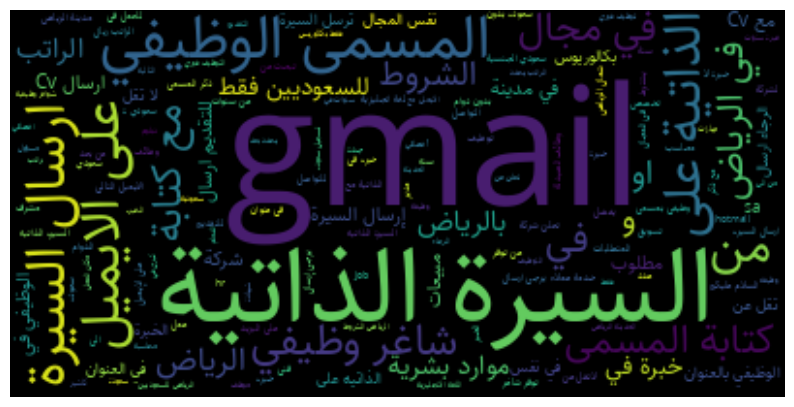

0.0 179361


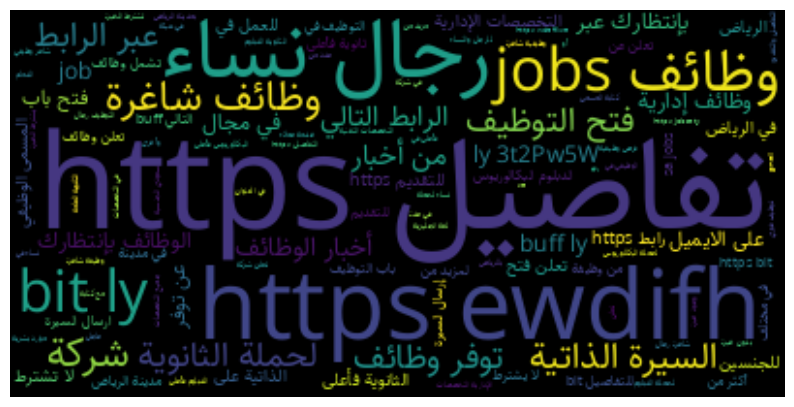

In [ ]:
# Generate a word cloud image

for cl in class_text:
    print(cl, len(class_text[cl]))

    wc = wordcloud = WordCloud(font_path="Sahel.ttf").generate(class_text[cl])

    # show
    plt.figure(figsize=[10,10])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

1.0 165978


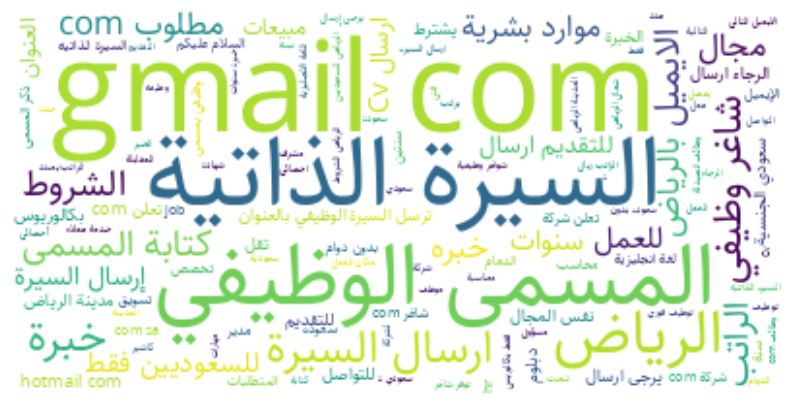

0.0 179361


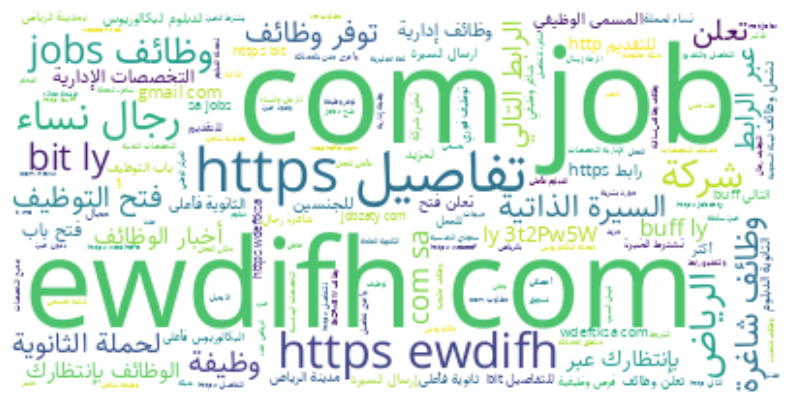

In [ ]:
stopwordsList= set(['#','أو','','','فى', 'في', 'كل', 'لم', 'لن', 'له', 'من', 'هو', 'هي', 'قوة', 'كما', 'لها', 'منذ', 'وقد', 'ولا', 'لقاء', 'مقابل', 'هناك', 'وقال', 'وكان', 'وقالت', 'وكانت', 'فيه', 'لكن', 'وفي', 'ولم', 'ومن', 'وهو', 'وهي', 'يوم', 'فيها', 'منها', 'يكون', 'يمكن', 'حيث', 'االا', 'اما', 'االتى', 'التي', 'اكثر', 'ايضا', 'الذى', 'الذي', 'الان', 'الذين', 'ابين', 'ذلك', 'دون', 'حول', 'حين', 'الى', 'انه', 'اول', 'انها', 'ف', 'و', 'و6', 'قد', 'لا', 'ما', 'مع', 'هذا', 'واحد', 'واضاف', 'واضافت', 'فان', 'قبل', 'قال', 'كان', 'لدى', 'نحو', 'هذه', 'وان', 'واكد', 'كانت', 'واوضح', 'ب', 'ا', 'أ', '،', 'عن', 'عند', 'عندما', 'على', 'عليه', 'عليها', 'تم', 'ضد', 'بعد', 'بعض', 'حتى', 'اذا', 'احد', 'بان', 'اجل', 'غير', 'بن', 'به', 'ثم', 'اف', 'ان', 'او', 'اي', 'بها', 'إلى','أن'])
# Generate a word cloud image
wc = WordCloud(background_color="white", max_words=1000,
               font_path='Sahel.ttf',
               collocations=True,
               stopwords=stopwordsList, contour_width=1, contour_color='firebrick')


for cl in class_text:
    print(cl, len(class_text[cl]))
    unicode_text= class_text[cl]
    unicode_text = ' '.join([w for w in unicode_text.split() if w not in stopwordsList])
    reshaped_text = arabic_reshaper.reshape(unicode_text)    # correct its shape
    #bidi_text = get_display(reshaped_text)

    # Generate a wordcloud
    wc.generate(class_text[cl])

    # show
    plt.figure(figsize=[10,10])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## Modeling

In [ ]:
import seaborn as sns
from matplotlib import pyplot
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,classification_report, f1_score


## Data spliting into features and target

In [ ]:
X = pdf_train['Text']
y= pdf_train['Class']

In [ ]:
X

0       #وظائف #الصيدلة \n\n3 شواغر بمسمى (فني صيدلي) ...
1       #وظائف #الصيدلة \n\nشركه طبيه متخصصه في الادوي...
2       #وظائف #الصيدلة \n\nالسلام عليكم ورحمة الله وب...
3       #وظائف #الصيدلة \n\nمجموعة صيدليات بحاجة الى :...
4       #وظائف #الصيدلة \n\nالسلام عليكم \nيارب تكونو ...
                              ...                        
1650    في مجال العطور موظفين و موظفات مبيعات خبرة لات...
1651    شركة كبرى في الرياض تعلن عن حاجتها لأخصائي تسو...
1652    فرصة عمل\nشركة رائده في مجال المطاعم\n\n ⚫ الر...
1653    علن احدى الشركات المتخصصة في مجال المطاعم في ا...
1654    \n⬅️ الوظيفة : مسؤولة خدمة عملاء \n\n⚫المدينه ...
Name: Text, Length: 1549, dtype: object

## Data Vectorization

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X)
X2 = vectorizer.transform(X)
X2.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Data Spliting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.20, random_state = 0, stratify = y)


## Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

In [ ]:
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))


Accuracy: 0.9419
Precision: 0.9157
Recall: 0.9744
F1 Score: 0.9441


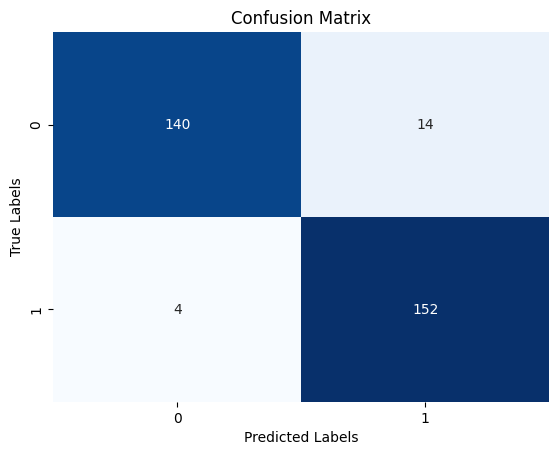

In [ ]:
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

## Support Vector Machine (SVM)

In [ ]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

In [ ]:
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))


Accuracy: 0.9226
Precision: 0.8837
Recall: 0.9744
F1 Score: 0.9268


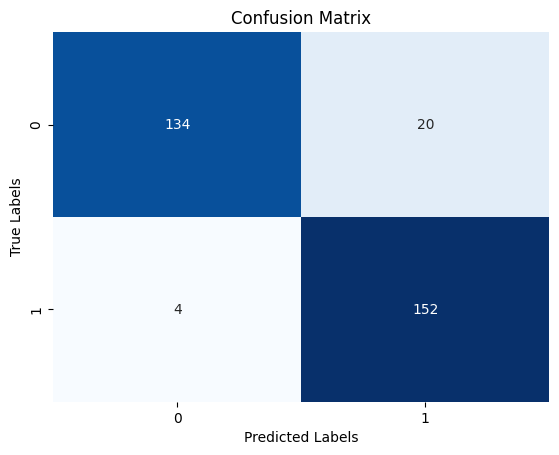

In [ ]:
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

# New Models

1 - **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (k) as per your preference
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)


In [ ]:
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

Accuracy: 0.8129
Precision: 0.7988
Recall: 0.8397
F1 Score: 0.8187


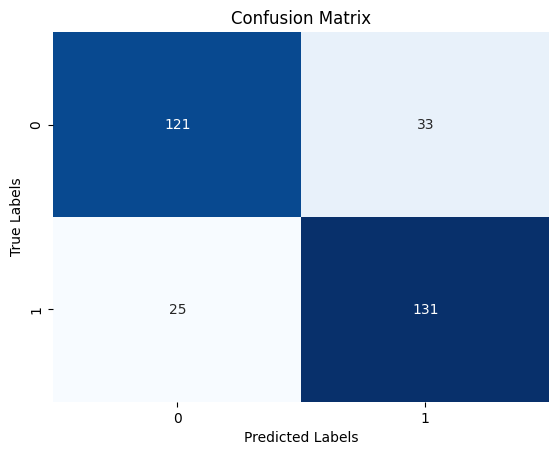

In [ ]:
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

2 - **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)


In [ ]:
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))


Accuracy: 0.9161
Precision: 0.9392
Recall: 0.8910
F1 Score: 0.9145


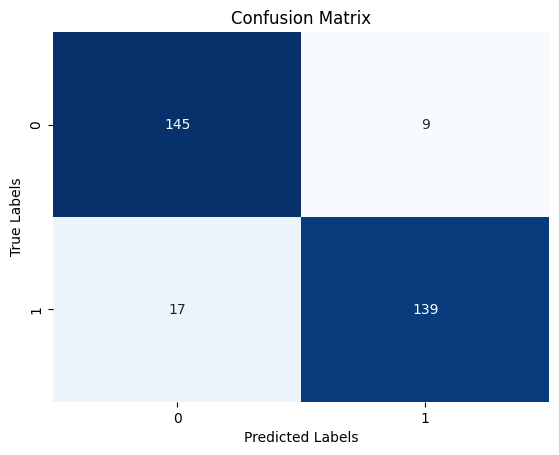

In [ ]:
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

3 - **XGB**

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)


In [ ]:
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))


Accuracy: 0.9290
Precision: 0.9241
Recall: 0.9359
F1 Score: 0.9299


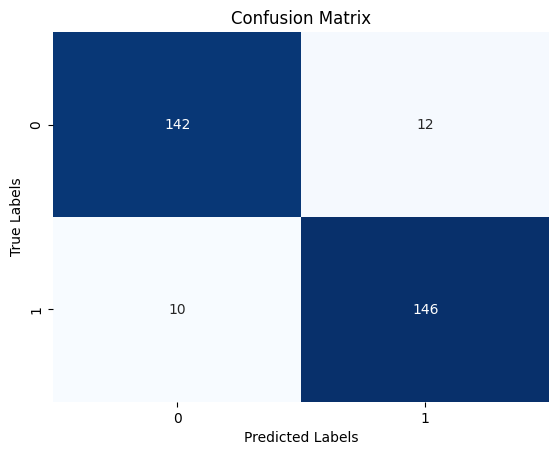

In [ ]:
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()